# Introduction

Welcome to **M148- Data Science Fundamentals!** This course is designed to equip you with the tools and experiences necessary to start you off on a life-long exploration of datascience. We do not assume a prerequisite knowledge or experience in order to take the course. 

For this first project we will introduce you to the end-to-end process of doing a datascience project. Our goals for this project are to:

1. Familiarize you with the development environment for doing datascience
2. Get you comfortable with the python coding required to do datascience
3. Provide you with an sample end-to-end project to help you visualize the steps needed to complete a project on your own
4. Ask you to recreate a similar project on a separate dataset

In this project you will work through an example project end to end. Many of the concepts you will encounter will be unclear to you. That is OK! The course is designed to teach you these concepts in further detail. For now our focus is simply on having you replicate the code successfully and seeing a project through from start to finish. 

Here are the main steps:

1. Get the data
2. Visualize the data for insights
3. Preprocess the data for your machine learning algorithm
4. Select a model and train
5. Does it meet the requirements? Fine tune the model

![steps](images/MLProcess.jpg)




## Working with Real Data

It is best to experiment with real-data as opposed to aritifical datasets. 

There are many different open datasets depending on the type of problems you might be interested in!

Here are a few data repositories you could check out:
- [UCI Datasets](https://archive.ics.uci.edu/ml/)
- [Kaggle Datasets](https://www.kaggle.com/)
- [AWS Datasets](https://registry.opendata.aws)


## Submission Instructions
**Project is due April 21st at 10:00 am. To submit the project, please save the notebook as a pdf file and submit the assignment via Gradescope. In addition,  Make sure that all figures are legible and sufficiently large.**


# Example Datascience Exercise
Below we will run through an California Housing example collected from the 1990's.

## Setup

Before getting started, it is always good to check the versions of important packages. Knowing the version number makes it easier to lookup correct documentation. 

To run this project, you will need the following packages installed with at least the minimal version number provided:
- Python Version >= 3.11
- Scikit-learn >= 1.12.0
- NumPy >= 1.26.4
- SciPy >= 1.12.0
- Pandas >= 2.2.1
- Matplotlib >= 3.8.3

The following code imports these packages and checks their version number. If any assertion error occurs, you may not have the correct version installed.

**Important: If installed using a package manager like Anaconda or pip, these dependencies should be resolved. Please follow the python setup guide provided during discussion of week 1. **

In [1]:
#Import and Version Test
#Python version test
import sys
assert sys.version_info >= (3, 11) # python>=3.11

#Machine learning library
import sklearn
assert sklearn.__version__ >= "1.4.1" # sklearn >= 1.4.1

#numerical packages in python
import numpy as np 
assert np.__version__ >= "1.26.4" # numpy >= 1.26.4

#Another numerical package, unused directly but is implicitly used in sklearn
#Check the version just in case
import scipy as scp
assert scp.__version__ >= "1.12.0" # scipy >= 1.12.0

#Package for data manipulation and analysis
import pandas as pd
assert pd.__version__ >= "2.2.1" # pandas >= 2.2.1

#matplotlib magic for inline figures
%matplotlib inline 
import matplotlib # plotting library
assert matplotlib.__version__ >= "3.8.3" # matplotlib >= 3.8.3


In [2]:
import os
import tarfile
import urllib

DATASET_PATH = os.path.join("datasets", "housing")

In [3]:
# Other setup with necessary plotting

# Instead of using matplotlib direclty, we will use their nice pyplot interface defined as plt
import matplotlib.pyplot as plt

# Set random seed to make this notebook's output identical at every run
np.random.seed(42)

# Plotting Utilities

# Where to save the figures
ROOT_DIR = "."
IMAGES_PATH = os.path.join(ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_name, tight_layout=True, fig_extension="png", resolution=300):
    """
    plt.savefig wrapper. refer to
    https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html
    """
    path = os.path.join(IMAGES_PATH, fig_name + "." + fig_extension)
    print("Saving figure", fig_name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Step 1. Getting the data

### Intro to Data Exploration Using Pandas

In this section we will load the dataset, do some cleaning, and visualize different
features using different types of plots.

Packages we will use:
- **[Pandas](https://pandas.pydata.org):** is a fast, flexibile and expressive data structure widely used for tabular and multidimensional datasets.
- **[Matplotlib](https://matplotlib.org)**: is a 2d python plotting library which you can use to create quality figures (you can plot almost anything if you're willing to code it out!)
    - other plotting libraries: [seaborn](https://seaborn.pydata.org), [ggplot2](https://ggplot2.tidyverse.org)

In [4]:
import pandas as pd


def load_housing_data(housing_path):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

First, we load the dataset into pandas Dataframe which you can think about as an array/table. The Dataframe has a lot of useful functionality which we will use throughout the class. 

In [5]:
housing = load_housing_data(DATASET_PATH)  # we load the pandas dataframe
housing.head()  # show the first few elements of the dataframe
# typically this is the first thing you do
# to see how the dataframe looks like

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


A dataset may have different types of features
- real valued
- Discrete (integers)
- categorical (strings)

The two categorical features are essentialy the same as you can always map a categorical string/character to an
integer. 

In the dataset example, all our features are real valued floats, except ocean proximity which is categorical.

In [6]:
# to see a concise summary of data types, null values, and counts
# use the info() method on the dataframe
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# you can access individual columns similarly
# to accessing elements in a python dict
print(housing["ocean_proximity"].head())  # added head() to avoid printing many columns.

# Additionally, columns can be accessed as attirbutes of the dataframe object
# This method is convenient to access data but should be used with care since you can't overwrite
# built in functions like housing.min()
print(housing.ocean_proximity.head())

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
Name: ocean_proximity, dtype: object
0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
Name: ocean_proximity, dtype: object


In [8]:
# to access a particular row we can use iloc
housing.iloc[1]

longitude              -122.22
latitude                 37.86
housing_median_age        21.0
total_rooms             7099.0
total_bedrooms          1106.0
population              2401.0
households              1138.0
median_income           8.3014
median_house_value    358500.0
ocean_proximity       NEAR BAY
Name: 1, dtype: object

In [9]:
# one other function that might be useful is
# value_counts(), which counts the number of occurences
# for categorical features
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [10]:
# The describe function compiles your typical statistics for each non-categorical column
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We can also perform groupings based on categorical values and analyze each group.

In [11]:
housing_group = housing.groupby("ocean_proximity")
# Has the mean for every column grouped by ocean proximity
housing_mean = housing_group.mean()
housing_mean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,-118.847766,34.560577,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,-119.732990,36.731829,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,-118.354000,33.358000,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,-122.260694,37.801057,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,-119.332555,34.738439,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


In [12]:
# We can also get the subset of data associated with that group

housing_inland = housing_group.get_group("INLAND")
housing_inland

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
954,-121.92,37.64,46.0,1280.0,209.0,512.0,208.0,5.1406,315600.0,INLAND
957,-121.90,37.66,18.0,7397.0,1137.0,3126.0,1115.0,6.4994,323000.0,INLAND
965,-121.88,37.68,23.0,2234.0,270.0,854.0,286.0,7.3330,337200.0,INLAND
967,-121.88,37.67,16.0,4070.0,624.0,1543.0,577.0,6.5214,311500.0,INLAND
968,-121.88,37.67,25.0,2244.0,301.0,937.0,324.0,6.4524,296900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [13]:
# We can thus performs operations on a each group separately
housing_inland.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,6551.00000,6551.000000,6551.000000,6551.000000,6496.000000,6551.000000,6551.000000,6551.000000,6551.000000
mean,-119.73299,36.731829,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
std,1.90095,2.116073,12.018020,2385.831111,446.117778,1168.670126,392.252095,1.437465,70007.908494
min,-123.73000,32.640000,1.000000,2.000000,2.000000,5.000000,2.000000,0.499900,14999.000000
25%,-121.35000,34.180000,15.000000,1404.000000,282.000000,722.000000,254.000000,2.188950,77500.000000
50%,-120.00000,36.970000,23.000000,2131.000000,423.000000,1124.000000,385.000000,2.987700,108500.000000
75%,-117.84000,38.550000,33.000000,3216.000000,636.000000,1687.000000,578.000000,3.961500,148950.000000
max,-114.31000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100,500001.000000


**Grouping is a powerful technique within pandas and a recommend reading the user guide to understand it better [here](https://pandas.pydata.org/docs/user_guide/groupby.html)**

In addition to grouping, we can also filter out the data based on our desired criteria.

In [14]:
housing_expensive = housing[(housing["median_house_value"] > 50000)]
housing_expensive.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
# We can combine multiple criteria
housing_expensive_small = housing[
    (housing["median_house_value"] > 50000) & (housing["population"] < 1000)
]
housing_expensive_small.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY


**If you want to learn about different ways of accessing elements or other functions it's useful to check out the getting started section of pandas [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html) and for a full look at all the functionaltiy that pandas offers you can check out the user guide of pandas [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html)**

## Step 2. Visualizing the data 

### Let's start visualizing the dataset

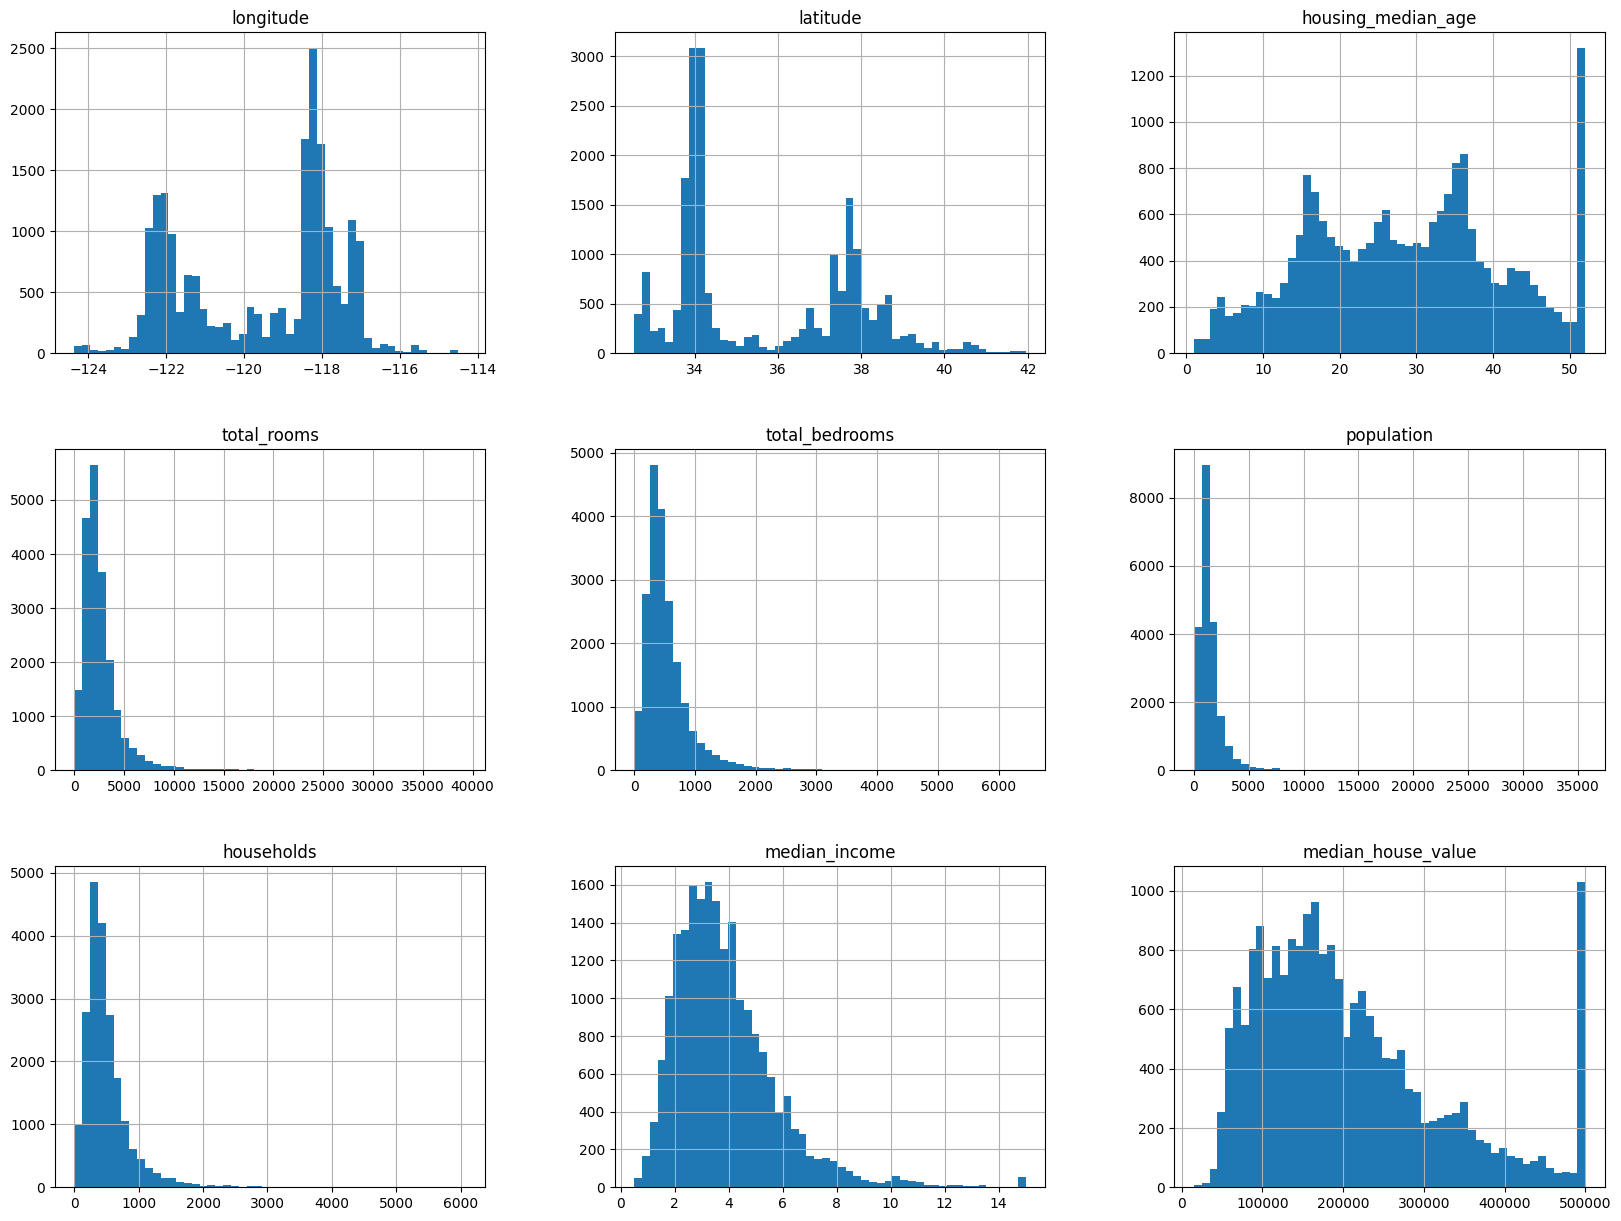

In [16]:
# We can draw a histogram for each of the dataframes features
# using the built-in hist function of Dataframe
housing.hist(bins=50, figsize=(20, 15))
# save_fig("attribute_histogram_plots")
plt.show()  # pandas internally uses matplotlib, and to display all the figures
# the show() function must be called

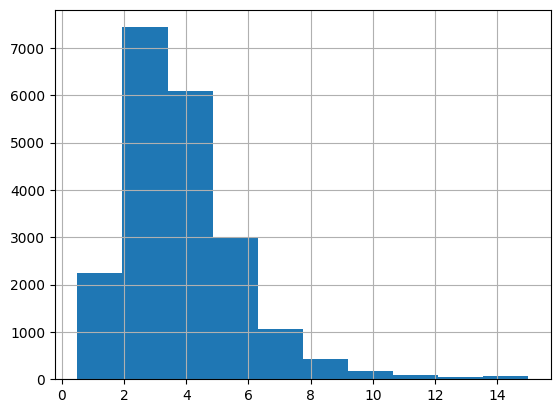

In [17]:
# if you want to have a histogram on an individual feature:
housing["median_income"].hist()
plt.show()

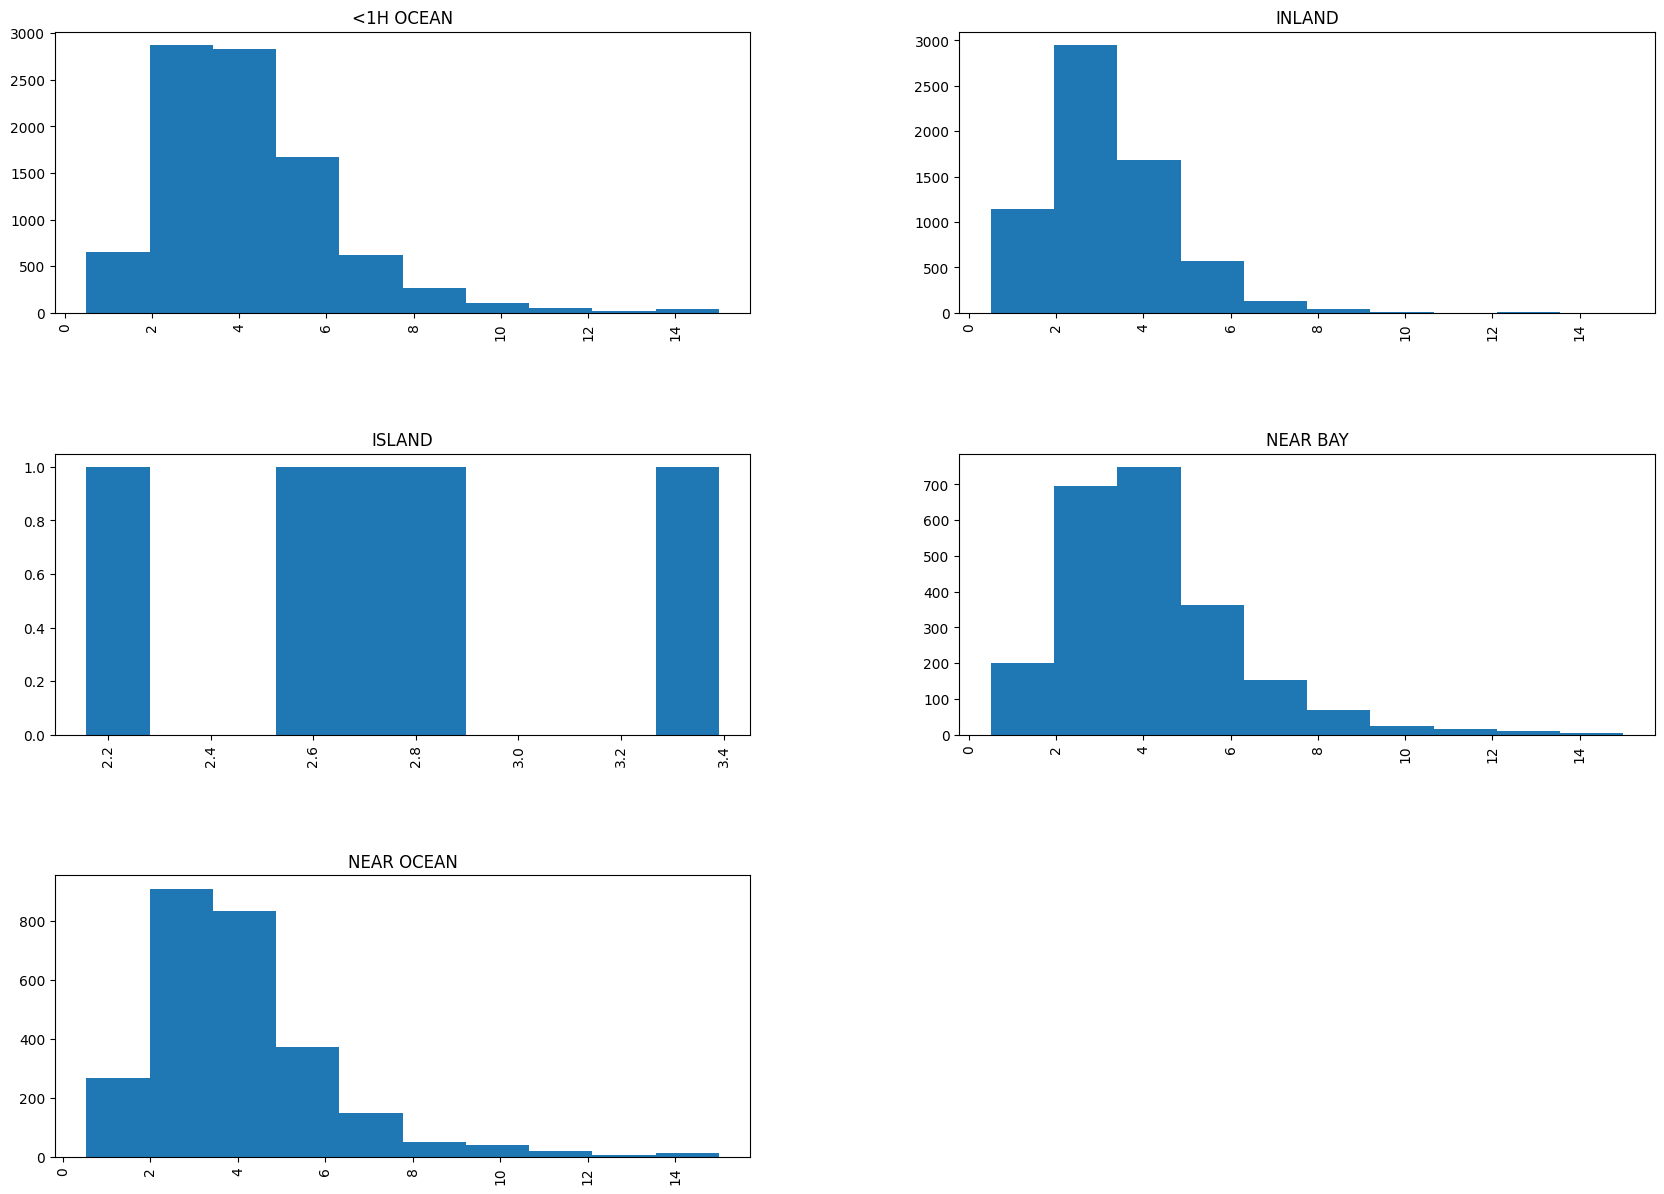

In [18]:
# You can even plot histograms by specifying the groupings using by
housing["median_income"].hist(by=housing["ocean_proximity"], figsize=(20, 15))
plt.show()

<Axes: xlabel='ocean_proximity'>

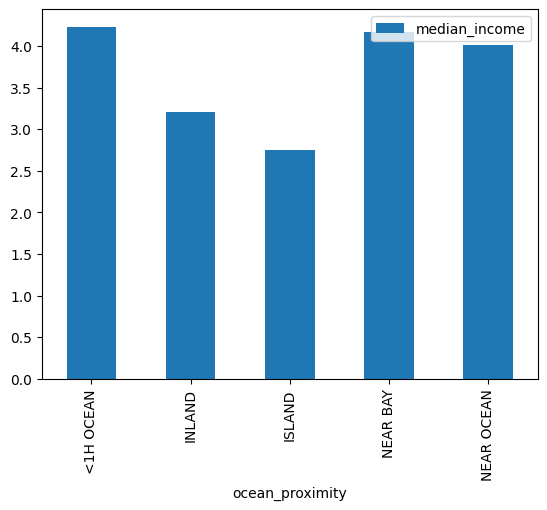

In [19]:
# We can also plot statistics of each groupings
housing_group_mean = housing.groupby("ocean_proximity").mean()

housing_group_mean.plot.bar(y="median_income")

We can convert a floating point feature to a categorical feature
by binning or by defining a set of intervals. 

For example, to bin the households based on median_income we can use the pd.cut function. Note that we use np.inf to represent infinity which is internally handeled. Thus, the last bin is $(6,\infty)$.

In [20]:
# assign each bin a categorical value [1, 2, 3, 4, 5] in this case.
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
    labels=[1, 2, 3, 4, 5],
)

housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

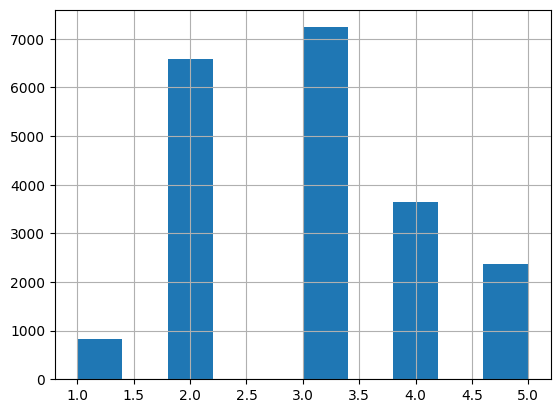

In [21]:
housing["income_cat"].hist()

**Next let's visualize the household incomes based on latitude & longitude coordinates**

<Axes: xlabel='longitude', ylabel='latitude'>

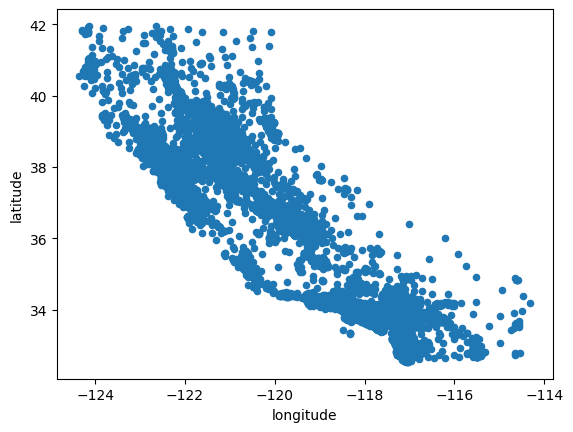

In [22]:
## here's a not so interesting way of plotting it
housing.plot(kind="scatter", x="longitude", y="latitude")
# save_fig("bad_visualization_plot")

<Axes: xlabel='longitude', ylabel='latitude'>

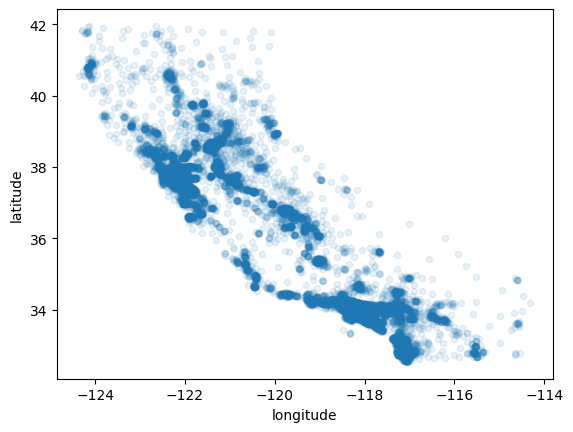

In [23]:
# we can make it look a bit nicer by using the alpha parameter,
# it simply plots less dense areas lighter.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
# save_fig("better_visualization_plot")

/var/folders/rp/9rff5pns6nsfmgx3vcq0ndh80000gn/T/ipykernel_54542/3858527943.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cb.ax.set_yticklabels(["$%dk" % (round(v / 1000)) for v in tick_values], fontsize=14)


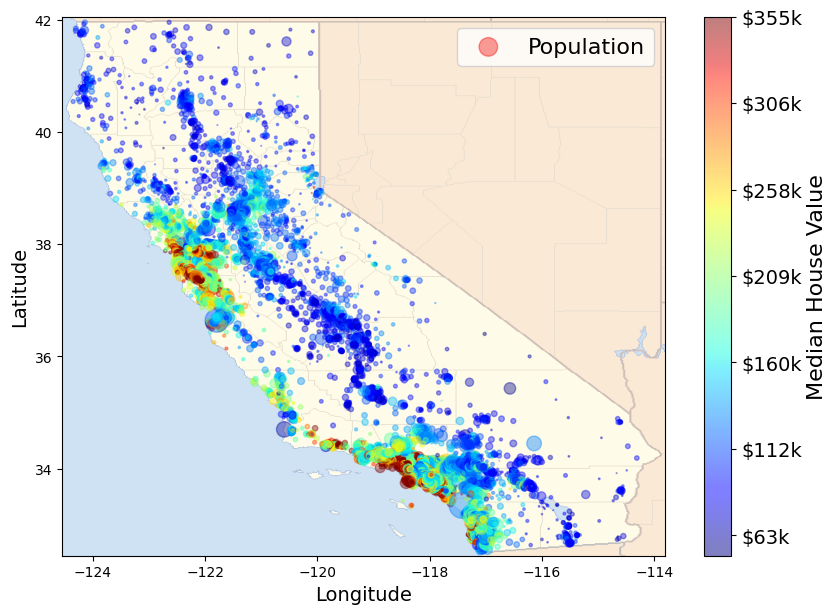

In [24]:
# A more interesting plot is to color code (heatmap) the dots
# based on income. The code below achieves this

# load an image of california
images_path = os.path.join("./", "images")
os.makedirs(images_path, exist_ok=True)
filename = "california.png"

import matplotlib.image as mpimg

california_img = mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    figsize=(10, 7),
    s=housing["population"] / 100,
    label="Population",
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    colorbar=False,
    alpha=0.4,
)
# overlay the califronia map on the plotted scatter plot
# note: plt.imshow still refers to the most recent figure
# that hasn't been plotted yet.
plt.imshow(
    california_img,
    extent=[-124.55, -113.80, 32.45, 42.05],
    alpha=0.5,
    cmap=plt.get_cmap("jet"),
)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# setting up heatmap colors based on median_house_value feature
prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cb = plt.colorbar()
cb.ax.set_yticklabels(["$%dk" % (round(v / 1000)) for v in tick_values], fontsize=14)
cb.set_label("Median House Value", fontsize=16)

plt.legend(fontsize=16)
# save_fig("california_housing_prices_plot")
plt.show()

Not suprisingly, we can see that the most expensive houses are concentrated around the San Francisco/Los Angeles areas.

Up until now we have only visualized feature histograms and basic statistics. 

When developing machine learning models the predictiveness of a feature for a particular target of interest is what's important.

It may be that only a few features are useful for the target at hand, or features may need to be augmented by applying certain transformations. 

Nonetheless we can explore this using correlation matrices. Each row and column of the correlation matrix represents a non-categorical feature in our dataset and each element specifies the correlation between the row and column features. [Correlation](https://en.wikipedia.org/wiki/Correlation) is a measure of how the change in one feature affects the other feature. For example, a positive correlation means that as one feature gets larger, then the other feature will also generally get larger. Note that a feature is always fully correlated to itself which is why the diagonal of the correlation matrix is just all 1s.

In [25]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [26]:
# for example if the target is "median_house_value", most correlated features can be sorted
# which happens to be "median_income". This also intuitively makes sense.
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

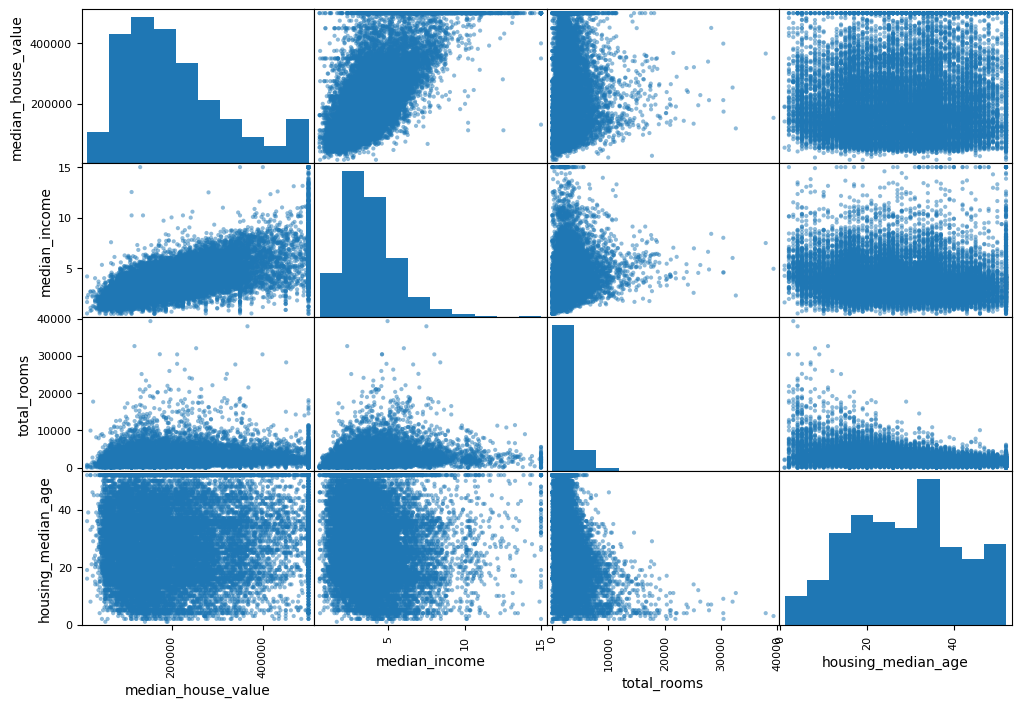

In [27]:
# We can plot a scatter matrix for different attributes/features
# to see how some features may show a positive correlation/negative correlation or
# it may turn out to be completely random!
from pandas.plotting import scatter_matrix

attributes = [
    "median_house_value",
    "median_income",
    "total_rooms",
    "housing_median_age",
]
scatter_matrix(housing[attributes], figsize=(12, 8))
# save_fig("scatter_matrix_plot")

(0.0, 16.0, 0.0, 550000.0)

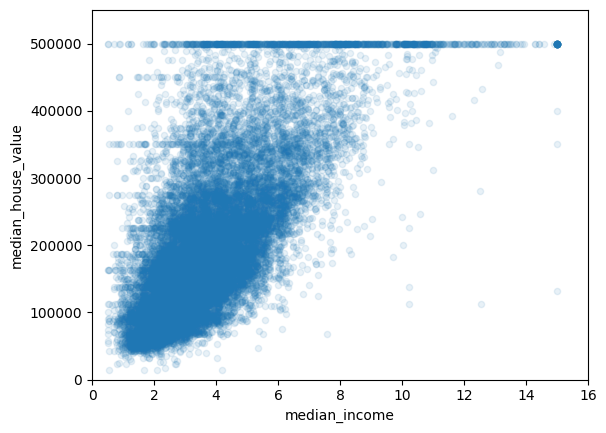

In [28]:
# median income vs median house value plot 2 in the first row of top figure
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])
# save_fig("income_vs_house_value_scatterplot")

### Augmenting Features: Simple Example
New features can be created by combining different columns from our data set.

- rooms_per_household = total_rooms / households
- bedrooms_per_room = total_bedrooms / total_rooms
- etc.

In [29]:
# A new column in the dataframe can be made the same away you add a new element to a dict
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [30]:
# obtain new correlations
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

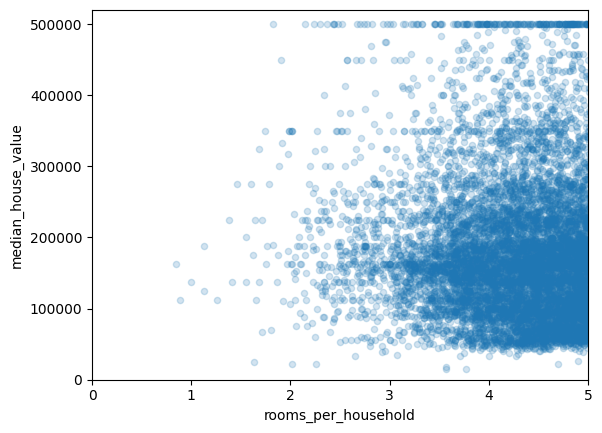

In [31]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value", alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [32]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


### Augmenting Features: Advanced Example
In addition to augmenting the data using these simple operations, we can also do some advanced augmentation by bringing information from another dataset. 

In this case, we are going to find the distance between the houses and the 10 biggest cities in California during 1990. Intuitively, the location of major cities can strongly impact the value of a home. Thus, our new feature will be the distance of the home to the closest big city among the 10 biggest cities.

To perform this feature extraction, we will use the provided dataset "city_data.csv". We will also employ some helper functions and use the pd.apply function to do the augmentation.

In [33]:
# Loads the city data
def load_city_data(housing_path):
    csv_path = os.path.join(housing_path, "city_data.csv")
    return pd.read_csv(csv_path)


city_data = load_city_data(DATASET_PATH)
city_data

,City,Latitude,Longitude,Pop_1990
0,Anaheim,33.835292,-117.914503,266406
1,Fresno,36.746842,-119.772586,354202
2,Long Beach,33.768322,-118.195617,429433
3,Los Angeles,34.052233,-118.243686,3485398
4,Oakland,37.804364,-122.271114,372242
5,Sacramento,38.581572,-121.494400,369365
6,San Diego,32.715328,-117.157256,1110549
7,San Francisco,37.774931,-122.419417,723959
8,San Jose,37.339386,-121.894956,782248
9,Santa Ana,33.745572,-117.867833,293742


In [34]:
# For ease of use, we will convert city_data into a python dict
# where the key is the city name and the value is the coordinates
city_dict = {}
for dat in city_data.iterrows():  # iterates through the rows of the dataframe
    row = dat[1]
    city_dict[row["City"]] = (row["Latitude"], row["Longitude"])

print(city_dict)

{'Anaheim': (33.835292, -117.914503), 'Fresno': (36.746842, -119.772586), 'Long Beach': (33.768322, -118.195617), 'Los Angeles': (34.052233, -118.243686), 'Oakland': (37.804364, -122.271114), 'Sacramento': (38.581572, -121.4944), 'San Diego': (32.715328, -117.157256), 'San Francisco': (37.774931, -122.419417), 'San Jose': (37.339386, -121.894956), 'Santa Ana': (33.745572, -117.867833)}


In [35]:
# Helper functions


# This function is used to calculate the distance between two points on a latitude and longitude grid.
# You don't need to understand the math but know that it takes into account the curverature of the earth
# to make an accurate distance measurement.
# While we could have used the geopy package to do this for us, this way we don't have to install it.
def distance_func(loc_a, loc_b):
    """
    Calculates the haversine distance between coordinates
    on the latitude and longitude grid.
    Distance is in km.
    """
    lat1, lon1 = loc_a
    lat2, lon2 = loc_b
    r = 6371
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = (
        np.sin(delta_phi / 2) ** 2
        + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    )
    res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
    return np.round(res, 2)


# Calculates closest point to the location given in kilometers
def closest_point(location, location_dict):
    """take a tuple of latitude and longitude and
    compare to a dictionary of locations where
    key = location name and value = (lat, long)
    returns tuple of (closest_location , distance)
    distance is in kilometers"""
    closest_location = None
    for city in location_dict.keys():
        distance = distance_func(location, location_dict[city])
        if closest_location is None:
            closest_location = (city, distance)
        elif distance < closest_location[1]:
            closest_location = (city, distance)
    return closest_location


# Example
closest_point((37.774931, -120.419417), city_dict)

('Fresno', 127.85)

In [36]:
# Now we apply the closest_point function to every data point in housing
# Axis = 1 specifies that apply will send each row one by one into the designated function
# We use the lambda function to catch the row and then disperse its arguments into closest_point
housing["close_city"] = housing.apply(
    lambda x: closest_point((x["latitude"], x["longitude"]), city_dict), axis=1
)

# Since closest point outputed a tuple of names and distance, we have to split it up.
housing["close_city_name"] = [x[0] for x in housing["close_city"].values]
housing["close_city_dist"] = [x[1] for x in housing["close_city"].values]

# Drop the redundant column
housing = housing.drop("close_city", axis=1)

In [37]:
# Now, let us look at our new features
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,close_city_name,close_city_dist
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,0.146591,2.555556,Oakland,9.15
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.238137,0.155797,2.109842,Oakland,7.64
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,8.288136,0.129516,2.802260,Oakland,5.76
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,5.817352,0.184458,2.547945,Oakland,5.40
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,6.281853,0.172096,2.181467,Oakland,5.40


In [38]:
# We can also look at the new statistics
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,close_city_dist
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655,44.045134
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050,55.807465
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308,0.420000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741,10.510000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116,20.930000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261,58.365000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333,436.610000


Now, let us see if the new feature provides some information about housing prices by looking at the correlation.

In [39]:
# obtain new correlations
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
close_city_dist            -0.307777
Name: median_house_value, dtype: float64

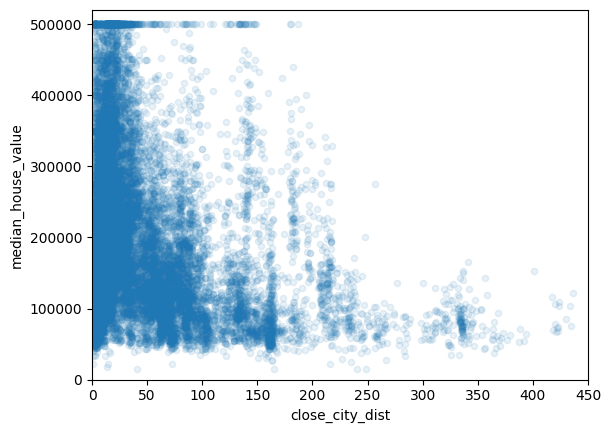

In [40]:
housing.plot(kind="scatter", x="close_city_dist", y="median_house_value", alpha=0.1)
plt.axis([0, 450, 0, 520000])
plt.show()

**Observation**: From the correlation, we can see a negative correlation implying that the farther a house is from a big city, the less it costs. From the plot, we can confirm the negative correlation. We can also note that most houses are within 250 km of the big cities which can indicate that everything past 250 is an outlier or should be treated differently like farm land. 

## Step 3. Preprocess the data for your machine learning algorithm

Once we've visualized the data, and have a certain understanding of how the data looks like. It's time to clean!

Most of your time will be spent on this step, although the datasets used in this project are relatively nice and clean... in the real world it could get real dirty.

After having cleaned your dataset you're aiming for:
- train set
- test set

In some cases you might also have a validation set as well for tuning hyperparameters (don't worry if you're not familiar with this term yet..)

In supervised learning setting your train set and test set should contain (**feature**, **target**) tuples. 
 - **feature**: is the input to your model
 - **target**: is the ground truth label
     - when target is categorical the task is a classification task
     - when target is floating point the task is a regression task
     
We will make use of **[scikit-learn](https://scikit-learn.org/stable/)** python package for preprocessing. 

Scikit learn is pretty well documented and if you get confused at any point simply look up the function/object [here](https://scikit-learn.org/stable/user_guide.html)!

### Dealing With Incomplete Data

In [41]:
# have you noticed when looking at the dataframe summary certain rows
# contained null values? we can't just leave them as nulls and expect our
# model to handle them for us so we'll have to devise a method for dealing with them...
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,close_city_name,close_city_dist
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,3,5.761468,NaN,2.614679,Oakland,10.49
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,2,3.830116,NaN,2.826255,Oakland,10.75
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,2,4.048704,NaN,2.938727,Oakland,2.82
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,4,6.102740,NaN,2.630137,Oakland,6.63
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,3,4.633540,NaN,2.403727,Oakland,19.70


In [42]:
# option 1: simply drop rows that have null values
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,close_city_name,close_city_dist


In [43]:
# option 2: drop the complete feature
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,close_city_name,close_city_dist
290,-122.16,37.77,47.0,1256.0,570.0,218.0,4.3750,161900.0,NEAR BAY,3,5.761468,NaN,2.614679,Oakland,10.49
341,-122.17,37.75,38.0,992.0,732.0,259.0,1.6196,85100.0,NEAR BAY,2,3.830116,NaN,2.826255,Oakland,10.75
538,-122.28,37.78,29.0,5154.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY,2,4.048704,NaN,2.938727,Oakland,2.82
563,-122.24,37.75,45.0,891.0,384.0,146.0,4.9489,247100.0,NEAR BAY,4,6.102740,NaN,2.630137,Oakland,6.63
696,-122.10,37.69,41.0,746.0,387.0,161.0,3.9063,178400.0,NEAR BAY,3,4.633540,NaN,2.403727,Oakland,19.70


In [44]:
# option 3: replace na values with median values
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"] = sample_incomplete_rows[
    "total_bedrooms"
].fillna(median)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,close_city_name,close_city_dist
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,NEAR BAY,3,5.761468,NaN,2.614679,Oakland,10.49
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0,NEAR BAY,2,3.830116,NaN,2.826255,Oakland,10.75
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY,2,4.048704,NaN,2.938727,Oakland,2.82
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0,NEAR BAY,4,6.102740,NaN,2.630137,Oakland,6.63
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0,NEAR BAY,3,4.633540,NaN,2.403727,Oakland,19.70


The option where we replace the null values with a new number is known as [imputation](https://en.wikipedia.org/wiki/Imputation_(statistics)).

Could you think of another plausible imputation for this dataset instead of using the median? (Not graded)

### Using Scikit-learn transformers to preprocess data


We have shown some operations that we want to perform on the dataset. While it is possible to manually perform it all yourselves, it is much easier to offload some of the work to the many fantastic machine learning packages. One such example is scikit-learn where we will demonstrate the use of a transformer to handle some of the work.

Consider a situation where we want to normalize the data for each feature. This involves calculating the mean $\mu$ and standard deviation $\sigma$ for that feature and applying $\frac{z-\mu}{\sigma}$ where $z$ is the feature value. We will show how to perform this using StandardScalar.

In [45]:
from sklearn.preprocessing import StandardScaler

# Extract two real valued columns
housing_sub = housing[["housing_median_age", "total_rooms"]]

scaler = StandardScaler()  # initiate class
# Calling .fit lets scaler calculate the mean and standard deviation, i.e. trains the standardizer
scaler.fit(housing_sub)
print("Mean: ", scaler.mean_)
print("Std: ", scaler.scale_)

# To perform the standardization, use the .transform function
housing_std = scaler.transform(housing_sub)
print("Transfrom output")
print(housing_std)

# As a shorthand, the function .fit_transform performs both operations
housing_std_2 = scaler.fit_transform(housing_sub)
print("Fit Transfrom output")
print(housing_std_2)

Mean:  [  28.63948643 2635.7630814 ]
Std:  [  12.58525273 2181.56240174]
Transfrom output
[[ 0.98214266 -0.8048191 ]
 [-0.60701891  2.0458901 ]
 [ 1.85618152 -0.53574589]
 ...
 [-0.92485123 -0.17499526]
 [-0.84539315 -0.35559977]
 [-1.00430931  0.06840827]]
Fit Transfrom output
[[ 0.98214266 -0.8048191 ]
 [-0.60701891  2.0458901 ]
 [ 1.85618152 -0.53574589]
 ...
 [-0.92485123 -0.17499526]
 [-0.84539315 -0.35559977]
 [-1.00430931  0.06840827]]


### Prepare Data using a pipeline

Now, we will show how we can use scikit learn to create a pipeline that performs all the data preparation in one clean function call. For simplicity, we will not perform the closest city feature extraction in this pipeline. 

It is very useful to combine several steps into one to make the process much simpler to understand and easy to alter.

In [46]:
housing = load_housing_data(DATASET_PATH)  # Load the dataset
# drop labels for training set features
housing_features = housing.drop("median_house_value", axis=1)
# the input to the model should not contain the true label
housing_target = housing["median_house_value"].copy()

In [47]:
housing_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [48]:
# This cell implements the complete pipeline for preparing the data
# using sklearns TransformerMixins
# Earlier we mentioned different types of features: categorical, and floats.
# In the case of floats we might want to convert them to categories.
# On the other hand categories in which are not already represented as integers must be mapped to integers before
# feeding to the model.

# Additionally, categorical values could either be represented as one-hot vectors or simple as normalized/unnormalized integers.
# Here we encode them using one hot vectors.

# DO NOT WORRY IF YOU DO NOT UNDERSTAND ALL THE STEPS OF THIS PIPELINE. CONCEPTS LIKE NORMALIZATION,
# ONE-HOT ENCODING ETC. WILL ALL BE COVERED IN DISCUSSION

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin

######Processing Real Valued Features
# column indices
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6


class AugmentFeatures(BaseEstimator, TransformerMixin):
    """
    implements the previous features we had defined
    housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
    housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
    housing["population_per_household"]=housing["population"]/housing["households"]
    """

    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X):
        # Note that we do not use the pandas indexing anymore
        # This is due to sklearn transforming the dataframe into a numpy array during the processing
        # Thus, depending on where AugmentFeatures is in the pipeline, a different input type can be expected
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[
                X, rooms_per_household, population_per_household, bedrooms_per_room
            ]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


# Example of using AugmentFeatures
housing_features_num = housing_features.drop(
    "ocean_proximity", axis=1
)  # remove the categorical features
attr_adder = AugmentFeatures(add_bedrooms_per_room=False)  # Create transformer object
housing_extra_attribs = attr_adder.transform(
    housing_features_num.values
)  # housing_num.values extracts the numpy array of the datafram

print("Example of Augment Features Transformer")
print(housing_extra_attribs[0])


# Pipiline for real valued features
num_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),  # Imputes using median
        ("attribs_adder", AugmentFeatures(add_bedrooms_per_room=True)),  #
        ("std_scaler", StandardScaler()),
    ]
)

# Example
# Output is a numpy array
housing_features_num_tr = num_pipeline.fit_transform(housing_features_num)
print("Example Output of Pipeline for numerical output")
print(housing_features_num_tr[0])

Example of Augment Features Transformer
[-122.23         37.88         41.          880.          129.
  322.          126.            8.3252        6.98412698    2.55555556]
Example Output of Pipeline for numerical output
[-1.32783522  1.05254828  0.98214266 -0.8048191  -0.97247648 -0.9744286
 -0.97703285  2.34476576  0.62855945 -0.04959654 -1.02998783]


In [49]:
# Full Pipeline

# Splits names into numerical and categorical features
numerical_features = list(housing_features_num)
categorical_features = ["ocean_proximity"]

# Applies different transformations on numerical columns vs categorial columns
full_pipeline = ColumnTransformer(
    [
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(), categorical_features),
    ]
)


# Example of full pipeline
# Output is a numpy array
housing_prepared = full_pipeline.fit_transform(housing_features)
print("Example Output of full Pipeline")
print(housing_prepared[0])

Example Output of full Pipeline
[-1.32783522  1.05254828  0.98214266 -0.8048191  -0.97247648 -0.9744286
 -0.97703285  2.34476576  0.62855945 -0.04959654 -1.02998783  0.
  0.          0.          1.          0.        ]


Now, we have a pipeline that easily processes the input data into our desired form. 

### Splitting our dataset

First we need to carve out our dataset into a training and testing cohort. To do this we'll use train_test_split, a very elementary tool that arbitrarily splits the data into training and testing cohorts.

Note that we first perform the train test split on the data before it was processed in the pipeline and then separatelyprocess the train and test data. This is done to avoid injecting information into the test data from the train data such filling in missing values in the test data with knowledge of the train data. 

In [50]:
from sklearn.model_selection import train_test_split

data_target = housing["median_house_value"]
train, test, target, target_test = train_test_split(
    housing_features, data_target, test_size=0.3, random_state=0
)

train = full_pipeline.fit_transform(train)
test = full_pipeline.fit_transform(test)

### Select a model and train

Once we have prepared the dataset it's time to choose a model.

As our task is to predict the median_house_value (a floating value), regression is well suited for this.

In [51]:
from sklearn.linear_model import LinearRegression

# Instantiate a linear regresion class
lin_reg = LinearRegression()
# Train the class using the .fit function
lin_reg.fit(train, target)

# let's try the full preprocessing pipeline on a few training instances
data = test
labels = target_test

# Uses predict to get the predicted target values
print("Predictions:", lin_reg.predict(data)[:5])
print("Actual labels:", list(labels)[:5])

Predictions: [210975.9892164  283834.89185828 179131.95542365  92162.26714094
 295068.95402291]
Actual labels: [136900.0, 241300.0, 200700.0, 72500.0, 460000.0]


In [52]:
from sklearn.metrics import mean_squared_error

preds = lin_reg.predict(test)
mse = mean_squared_error(target_test, preds)
rmse = np.sqrt(mse)
rmse

69145.58671722481

# TODO: Applying the end-end ML steps to a different dataset.

We will apply what we've learnt to another dataset ([NYC airbnb dataset from 2019](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data)). We will predict airbnb price based on other features. 

Note: You do not have to use only one cell when programming your code and can do it over multiple cells.

## [50 pts] Visualizing Data 


### [10 pts] Load the data + statistics


#### - Load the dataset: airbnb/AB_NYC_2019.csv and display the first 5 few rows of the data

In [53]:
def load_airbnb_data(airbnb_path):
    csv_path = os.path.join(airbnb_path, "AB_NYC_2019.csv")
    return pd.read_csv(csv_path)

In [54]:
AIRBNB_PATH = os.path.join("datasets", "airbnb")
airbnb = load_airbnb_data(AIRBNB_PATH)
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### - Pull up info on the data type for each of the data fields. Will any of these be problematic feeding into your model (you may need to do a little research on this)? Discuss:

In [55]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Objects could be problematic because they cannot be graphed and are non numerical.

#### - Drop the following columns: name, id, host_id, host_name, last_review, and reviews_per_month and display first 5 rows

In [56]:
airbnb = airbnb.drop(columns=["name", "id", "host_id", "host_name", "last_review", "reviews_per_month"])
airbnb.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


#### - Display a summary of the statistics of the loaded data using .describe

In [57]:
airbnb.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


### [10 pts] Plot [boxplots](https://en.wikipedia.org/wiki/Box_plot) for the following 3 features: availability_365, number_of_reviews, price

You may use either pandas or matplotlib to plot the boxplot

<Axes: >

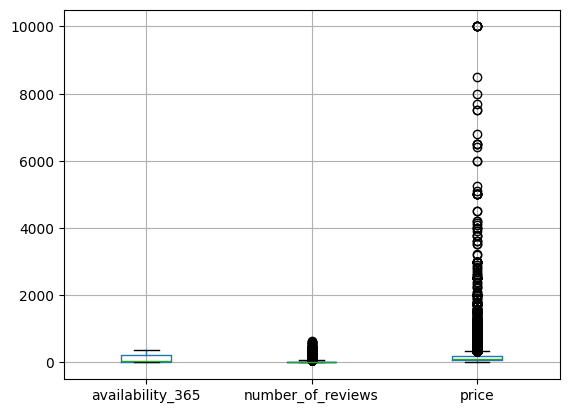

In [58]:
airbnb.boxplot(column =['availability_365', 'number_of_reviews', 'price'])

#### - What do you observe from the boxplot about the features? Anything suprising?

The distribution of the data is much larger for price. The distribution of number_of_reviews and availabilility_365 is relatively similar in comparison, with number_of_reviews having slightly larger. Additionally, for number_of_reviews and price there are many outliers while availabilility_365 has none.

### [10 pts] Plot median price of a listing per neighbourhood_group using a bar plot

<Axes: xlabel='neighbourhood_group'>

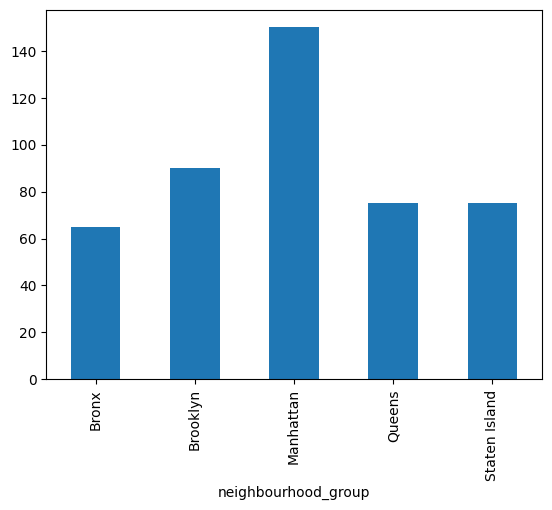

In [59]:
airbnb_neighborhood = airbnb.groupby("neighbourhood_group")
airbnb_neighborhood_median = airbnb_neighborhood["price"].median()
airbnb_neighborhood_median.plot.bar()

#### - Describe what you expected to see with these features and what you actually observed 

[Response here]

#### - So we can see different neighborhoods have dramatically different pricepoints, but how does the price breakdown by range. To see let's do a histogram of price by neighborhood to get a better sense of the distribution. 

To prevent outliers from affecting the histogram, use the input *range = [0,300]* in the histogram function which will upperbound the max price to 300 and ignore the outliers.

neighbourhood_group
Bronx            Axes(0.125,0.11;0.775x0.77)
Brooklyn         Axes(0.125,0.11;0.775x0.77)
Manhattan        Axes(0.125,0.11;0.775x0.77)
Queens           Axes(0.125,0.11;0.775x0.77)
Staten Island    Axes(0.125,0.11;0.775x0.77)
Name: price, dtype: object

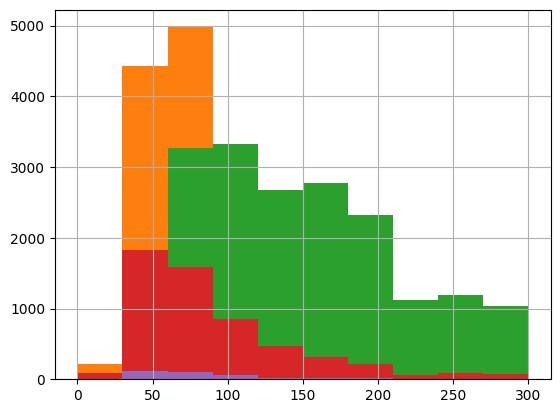

In [60]:
airbnb_neighborhood["price"].hist(range = [0,300])

### [5 pts] Plot a map of airbnbs throughout New York. You do not need to overlay a map.

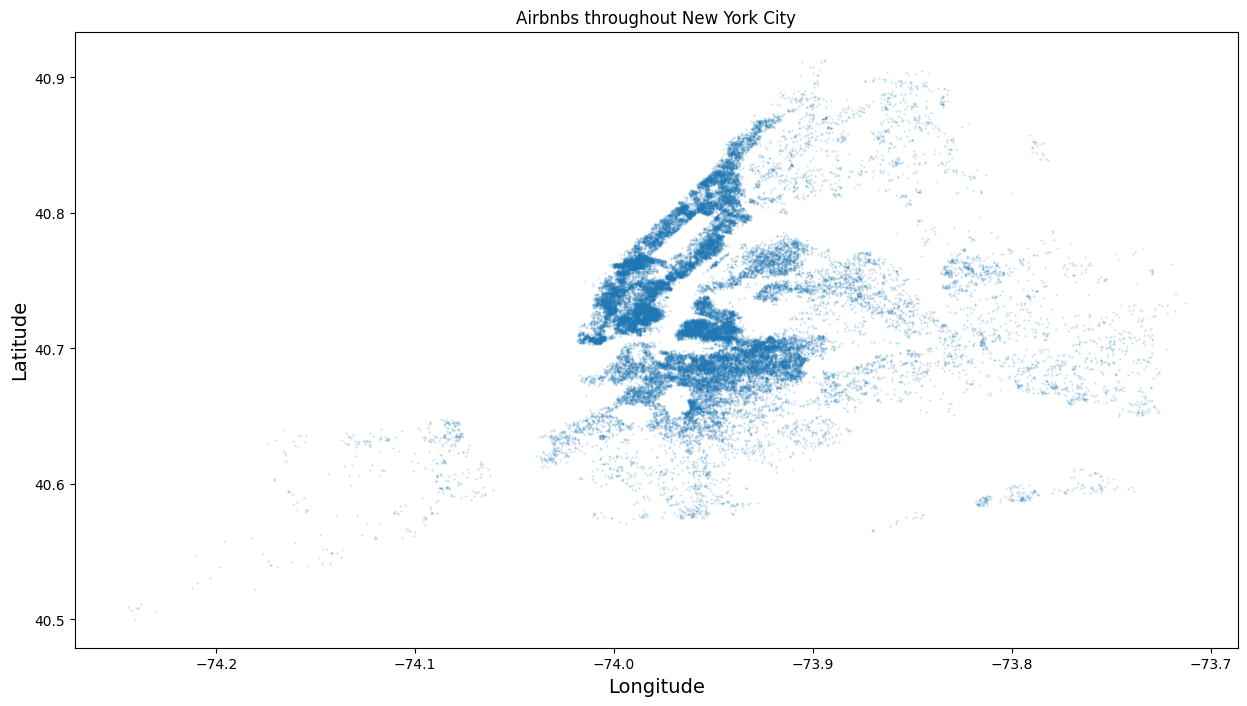

In [61]:
ax2 = airbnb.plot(kind="scatter", x="longitude", y="latitude", alpha=0.25, figsize=(15,8), s=0.25)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.title("Airbnbs throughout New York City")
plt.show()

### [10 pts] Plot median price of room types who have availability greater than 180 days and neighbourhood_group is Manhattan 

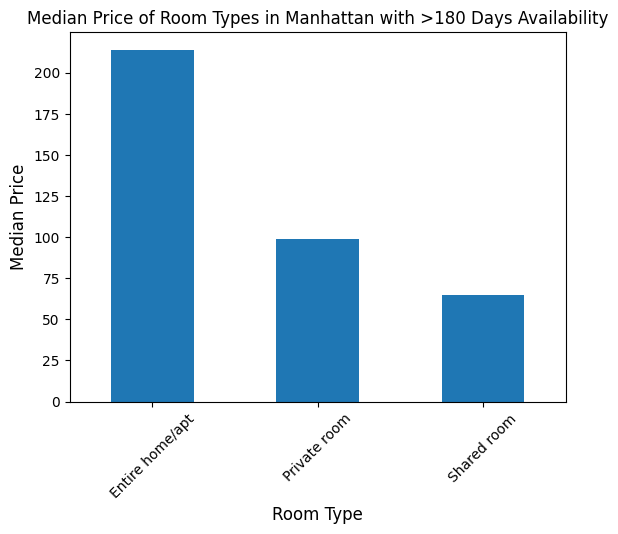

In [62]:
manhattan_airbnb = airbnb[(airbnb['availability_365'] > 180) & (airbnb['neighbourhood_group'] == 'Manhattan')]

median_prices = manhattan_airbnb.groupby('room_type')['price'].median()

median_prices.plot.bar()
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Median Price', fontsize=12)
plt.title('Median Price of Room Types in Manhattan with >180 Days Availability')
plt.xticks(rotation=45)
plt.show()

### [5 pts] Find features that correlate with price
Using the correlation matrix:
- which features have positive correlation with the price?
- which features have negative correlation with the price?


In [63]:
correlation_matrix = airbnb.corr(numeric_only=True)
print(correlation_matrix)
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print("Positive correlations with price:")
print(price_correlations[price_correlations > 0])

print("\nNegative correlations with price:")
print(price_correlations[price_correlations < 0])


                                latitude  longitude     price  minimum_nights  \
latitude                        1.000000   0.084788  0.033939        0.024869   
longitude                       0.084788   1.000000 -0.150019       -0.062747   
price                           0.033939  -0.150019  1.000000        0.042799   
minimum_nights                  0.024869  -0.062747  0.042799        1.000000   
number_of_reviews              -0.015389   0.059094 -0.047954       -0.080116   
calculated_host_listings_count  0.019517  -0.114713  0.057472        0.127960   
availability_365               -0.010983   0.082731  0.081829        0.144303   

                                number_of_reviews  \
latitude                                -0.015389   
longitude                                0.059094   
price                                   -0.047954   
minimum_nights                          -0.080116   
number_of_reviews                        1.000000   
calculated_host_listings_count   

As shown, availability_365, calculated_host_listings_count, minimum_nights, and latitude have positive correlation with price. number_of_reviews and longitude have negative correlation with price.

#### - Plot the full Scatter Matrix to see the correlation between prices and the other features

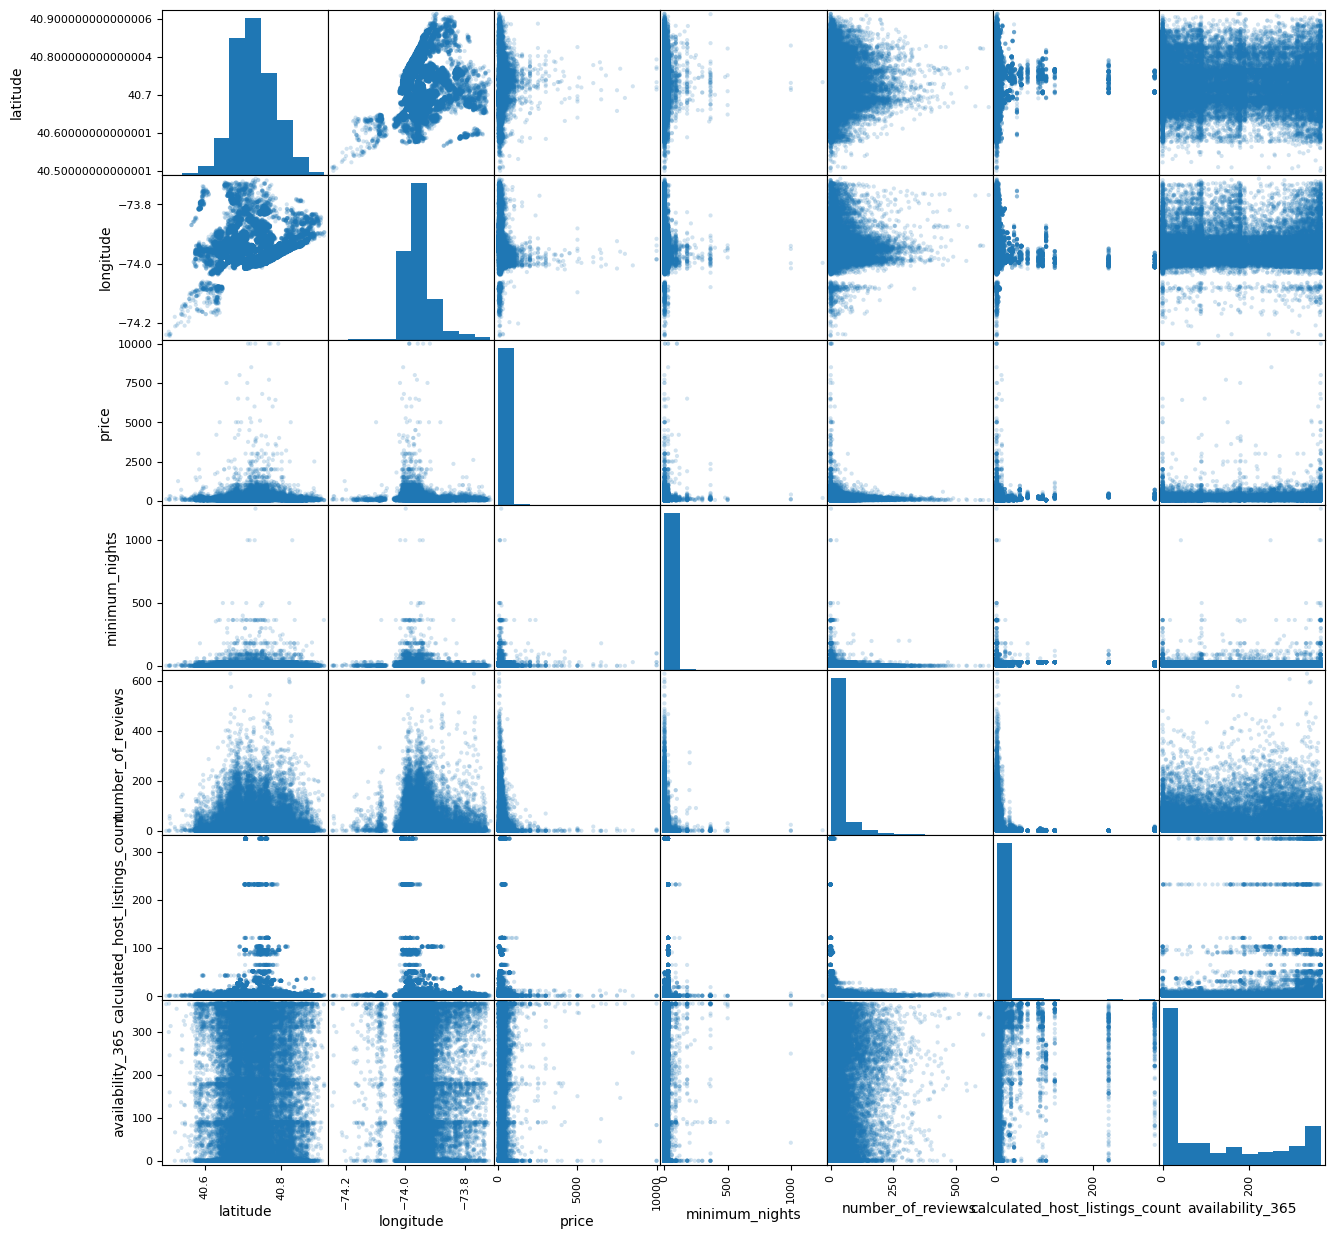

In [64]:
scatter_matrix(airbnb, alpha=0.2, figsize=(15, 15))
plt.show()

## [30 pts] Prepare the Data

### [5 pts] Partition the data into the features and the target data. The target data is price. Then partition the feature data into categorical and numerical features.

In [65]:
target_data = airbnb['price']

features_data = airbnb.drop(columns=['price'])

categorical_features = features_data.select_dtypes(include=['object']).columns.tolist()
numerical_features = features_data.select_dtypes(include=[np.number]).columns.tolist()

categorical_data = features_data[categorical_features]
numerical_data = features_data[numerical_features]

print("Categorical Data Columns:")
print(categorical_data.head())

print("\nNumerical Data Columns:")
print(numerical_data.head())

Categorical Data Columns:
  neighbourhood_group neighbourhood        room_type
0            Brooklyn    Kensington     Private room
1           Manhattan       Midtown  Entire home/apt
2           Manhattan        Harlem     Private room
3            Brooklyn  Clinton Hill  Entire home/apt
4           Manhattan   East Harlem  Entire home/apt

Numerical Data Columns:
   latitude  longitude  minimum_nights  number_of_reviews  \
0  40.64749  -73.97237               1                  9   
1  40.75362  -73.98377               1                 45   
2  40.80902  -73.94190               3                  0   
3  40.68514  -73.95976               1                270   
4  40.79851  -73.94399              10                  9   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               

### [10 pts] Create a scikit learn Transformer that augments the numerical data with the following two features 

- Max_yearly_bookings = availability_365 / minimum_nights

- Distance from airbnb to the NYC JFK Airport 
    - Latitude: 40.641766 , Longitude: -73.780968

Make sure to append these new features in this order.

You may use the previously defined distance_func for the distance calculation.

Note that this Transformer will be applied after imputation so we do not have to worry about Nulls in the data.

In [67]:
class AugmentFeaturesTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, jfk_coords=(40.641766, -73.780968)):
        self.jfk_coords = jfk_coords

    def fit(self, X, y=None):
        return self  # Nothing else to do

    def transform(self, X):
        # Assuming 'availability_365' is at index 0 and 'minimum_nights' is at index 1
        max_yearly_bookings = X[:, 0] / np.maximum(X[:, 1], 1)  # Avoid division by zero
        
        # Assuming 'latitude' is at index 2 and 'longitude' is at index 3
        lat = X[:, 2]
        lon = X[:, 3]
        distances = self.calculate_distances(lat, lon, self.jfk_coords)

        # Append the new features and return the array
        return np.c_[X, max_yearly_bookings, distances]

    def calculate_distances(self, lat, lon, jfk_coords):
        lat_jfk, lon_jfk = jfk_coords
        # Use the provided distance function
        return distance_func((lat, lon), jfk_coords)

#### -Test your new agumentation class by applying it to the numerical data you created. Print out the first 3 rows of the resultant data.

Do not worry about missing data since none of the features we used involved nulls.

In [69]:
transformer = AugmentFeaturesTransformer()
transformed_data = transformer.transform(numerical_data)
transformed_data.head(3)

InvalidIndexError: (slice(None, None, None), 0)

### [10 pts] Create a sklearn pipeline that performs the following operations of the feature data

Now, we will create a full pipeline that processes the data before creating the model.

For the numerical data, perfrom the following operations in order:
- Use a SimpleImputer that imputes using the median value
- Use the custom feature augmentation made in the previous part
- Use StandardScaler to standardize the mean and standard deviation

For categorical features, perform the following:
- Perform one hot encoding on all the remaining categorical features: {neighbourhood_group, room_type} 

**After making the pipeline, perform the transform operation on the feature data and print out the first 3 rows.**

In [336]:
numerical_cols = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'Max_yearly_bookings', 'Distance_to_JFK']
categorical_cols = ['neighbourhood_group', 'neighbourhood', 'room_type']

# Pipeline for numerical data
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('augment_features', AugmentFeaturesTransformer()),
    ('scaler', StandardScaler())
])

# Pipeline for categorical data
cat_pipeline = Pipeline([
    ('one_hot', OneHotEncoder())
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols)
])

# Apply the full pipeline to the data
prepared_data = full_pipeline.fit_transform(airbnb)

# cat_features_names = full_pipeline.named_transformers_['cat']['one_hot'].get_feature_names_out()
# all_features_names = np.append(['Max_yearly_bookings', 'Distance_to_JFK'], cat_features_names)

# print(airbnb_prepared)

airbnb_prepared_df = pd.DataFrame(airbnb_prepared, columns=all_features_names)
print(airbnb_prepared_df.head(3))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
airbnb_prepared

In [ ]:
x = AugmentFeaturesTransformer()
y = x.fit_transform(airbnb[numerical_cols])
print(y)

### [5 pts] Set aside 20% of the data as test test (80% train, 20% test). Apply previously created pipeline to the train and test data separately as shown in the introduction example. 

In [ ]:
# num_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='median')),
#     ('augment_features', AugmentFeaturesTransformer()),
#     ('scaler', StandardScaler())
# ])

# cat_pipeline = Pipeline([
#     ('one_hot', OneHotEncoder())
# ])

# full_pipeline = ColumnTransformer([
#     ('num', num_pipeline, numerical_cols),
#     ('cat', cat_pipeline, categorical_cols)
# ])

# features = airbnb.drop('price', axis=1)
# target = airbnb['price']

# Split the dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

# Fit and transform the training data
X_train_prepared = full_pipeline.fit_transform(X_train)

# Transform the test data
X_test_prepared = full_pipeline.transform(X_test)

print("Transformed Train Data Sample:")
print(X_train_prepared[:3])

print("Transformed Test Data Sample:")
print(X_test_prepared[:3])

## [20 pts] Fit a Linear Regression Model

The task is to predict the price, you could refer to the housing example on how to train and evaluate your model using the mean squared error (MSE).
Provide both test and train set MSE values.

In [ ]:
# Linear regression model
model = LinearRegression()

model.fit(X_train_prepared, y_train)

# Predict the prices on the training set
train_predictions = model.predict(X_train_prepared)

# Predict the prices on the test set
test_predictions = model.predict(X_test_prepared)

# MSE for the training set
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)  # RMSE

# MSE for the test set
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)  # RMSE

print(f"Training MSE: {train_mse}, Training RMSE: {train_rmse}")
print(f"Test MSE: {test_mse}, Test RMSE: {test_rmse}")